<a href="https://colab.research.google.com/github/Dawon00/Deep_Learning_Seminar/blob/master/210406_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# python

In [3]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

print(x.shape, y.shape)

(569, 30) (569,)


In [4]:
x[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

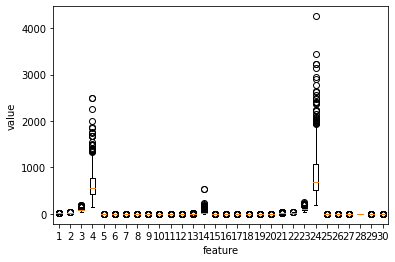

In [5]:
import matplotlib.pyplot as plt

plt.boxplot(x)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [8]:
import numpy as np

np.unique(y, return_counts=True)

(array([0, 1]), array([212, 357]))

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 22) #test : train = 2: 8
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

np.unique(y_train, return_counts = True)

(455, 30) (455,)
(114, 30) (114,)


(array([0, 1]), array([170, 285]))

In [17]:
class LogisticRegression:
  def __init__(self):
    self.W = None
    self.b = None

  def forpass(self, x):
    z = np.sum(x * self.W) + self.b
    return z

  def sigmoid(self, z):
    a = 1 / (1 + np.exp(-z))
    return a
  
  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def fit(self, x, y):
    self.W = np.ones(x.shape[1])
    self.b = 0

    for i in range(20000 + 1):
      for x_i, y_i in zip(x, y):
        z = self.forpass(x_i)
        a = self.sigmoid(z)
        err = (y_i - a)
        w_grad, b_grad = self.backprop(x_i, err)
        self.W -= w_grad
        self.b -= b_grad

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    a = self.sigmoid(np.array(z))
    return a > 0.5


In [18]:
neuron = LogisticRegression()
neuron.fit(x_train, y_train)

In [20]:
np.mean(neuron.predict(x_test) == y_test)

0.631578947368421

#tensorflow

In [22]:
import tensorflow as tf

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units = 1, input_dim = x_train.shape[1], activation='sigmoid'))#units = output shape, input_dim은 들어오는 데이터의 차원
tf.model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.003), metrics=['accuracy'])
tf.model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = tf.model.fit(x_train, y_train, epochs = 100)#history에 오차와 정확도가 담긴다

Epoch 1/100
15/15 [==============================] - 1s 1ms/step - loss: 488.7765 - accuracy: 0.4912
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 669.4938 - accuracy: 0.4559
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 237.1587 - accuracy: 0.6075
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 293.3587 - accuracy: 0.6092
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 281.4216 - accuracy: 0.5683
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 274.1424 - accuracy: 0.5595
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 149.1767 - accuracy: 0.6467
Epoch 8/100
15/15 [==============================] - 0s 1ms/step - loss: 144.3462 - accuracy: 0.7881
Epoch 9/100
15/15 [==============================] - 0s 1ms/step - loss: 111.8819 - accuracy: 0.7161
Epoch 10/100
15/15 [==============================] - 0s 1ms/step - loss: 172.0775 - accura

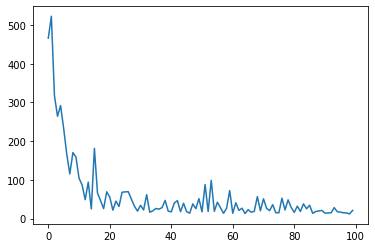

In [24]:
plt.plot(history.history['loss'])
plt.show()

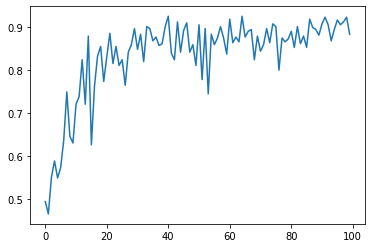

In [25]:
plt.plot(history.history['accuracy'])
plt.show()

In [26]:
print('Acc : ', history.history['accuracy'][-1])

Acc :  0.8835164904594421


In [27]:
predict = tf.model.predict([x_test])
y_predict = [1 if i > 0.5 else 0 for i in predict]
np.mean(y_predict == y_test)

0.7280701754385965